# Predicting Heart Disease using Naive Bayes Algorithom

This notebook will introduce some foundation `Naive Bayes Algorithom` and data science concepts by exploring the problem of heart disease classification.

## 1. Problem Definition

the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,
    
    Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### Download the data : https://www.kaggle.com/ronitf/heart-disease-uci/

### Heart Disease Data Dictionary 

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

    1. age - age in years
    2. sex - (1 = male; 0 = female)
    3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease

    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
      
    5. chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes

    7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
        2: Possible or definite left ventricular hypertrophy
        
    7. thalach - maximum heart rate achieved 
    8. exang - exercise induced angina (1 = yes; 0 = no)     
    9. oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more

    10. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart

    11. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
        
    12. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising

    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)       

In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Load Data

In [46]:
df = pd.read_csv('../materials/heart-disease.csv')

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory data analysis (EDA)

In [48]:
df.shape


(303, 14)

In [49]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

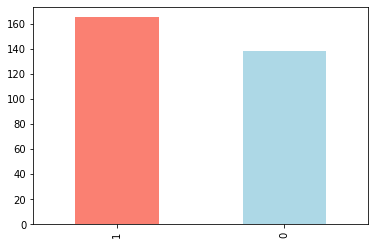

In [50]:
# we can Plot the value counts with a bar graph

df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);



df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Another way to get some quick insights on your dataframe is to use df.describe(). `describe()` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender



In [53]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

There are 207 males and 96 females in our study.

### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach (maximum heart rate)` and then comparing them to our target variable heart disease.

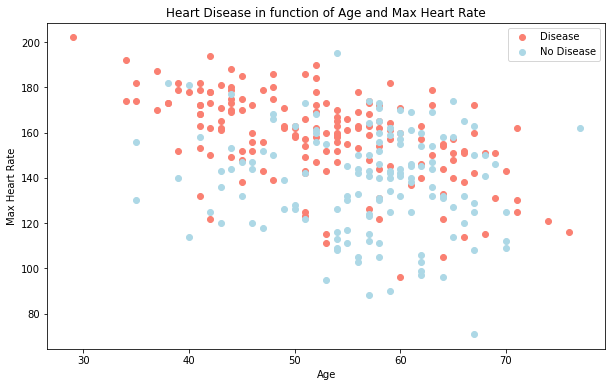

In [54]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon")

# Now for negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age `distribution`.

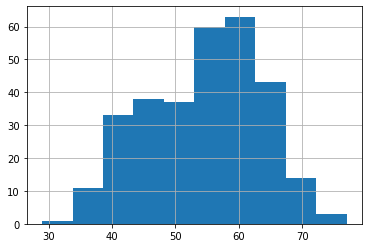

In [55]:
df.age.hist();

We can see it's a `normal distribution` but slightly swaying to the right, which reflects in the scatter plot above.

### Correlation between independent variables

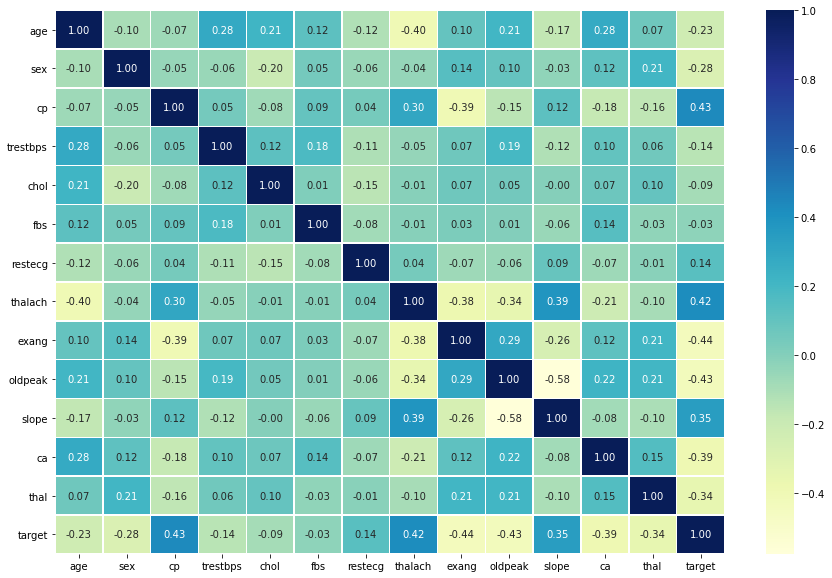

In [56]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Modeling


In [57]:
# Everything except target variable
X = df.drop("target", axis=1)


# Target variable
y = df.target.values

In [58]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [59]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [60]:
GNB.score(X_test, y_test)

0.8688524590163934

* We got 86% accuracy which is not bad.
* We can achieve more accuracy by applying `HyperParameter Tunning`

### Confusion Matrix

In [61]:
y_preds = GNB.predict(X_test)

In [62]:
 y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

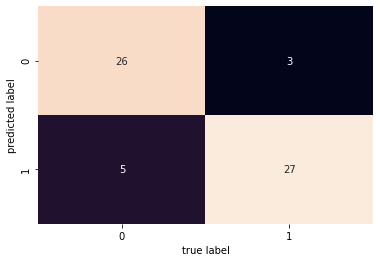

In [63]:
sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");

in this predicton our Model `missclassified 8 times` 
    
* True Positive = 26
* False Positive = 3 (MissClassified)

* True Negative = 27
* False Negative = 5 (MissClassified)
    